In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url_fl = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url_wthr = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
df_fl = pd.read_csv(url_fl, sep = ',') #won't work!
df_wthr = pd.read_csv(url_wthr, sep = ',')

### Case №1
#### Let's start with the easiest
We try to find the relation between month and depature delay.<br>
Firstly, we find mean of depature delay in evry month <br>
Secondly, we find quantity of depauture delays in evry month

    month  Mean_Delay_Depature  Num_Of_Delays
0       1            10.036665       341410.0
1       2            10.816843       322073.0
2       3            13.227076       444060.0
3       4            13.938038       465845.0
4       5            12.986859       443117.0
5       6            20.846332       630104.0
6       7            21.727787       678868.0
7       8            12.611040       436594.0
8       9             6.722476       278814.0
9      10             6.243988       275272.0
10     11             5.435362       236519.0
11     12            16.576688       504107.0


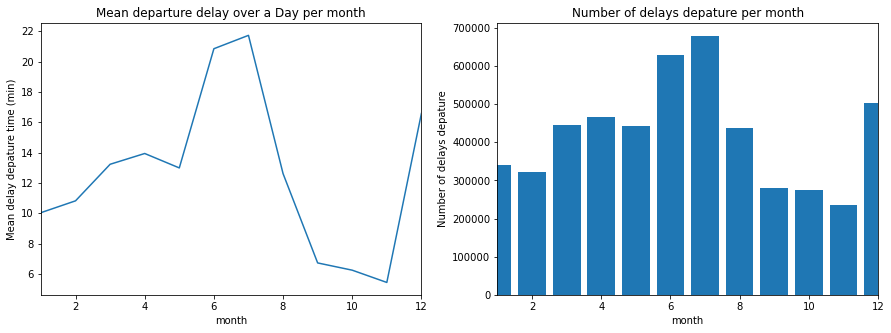

In [7]:
month_data = pd.DataFrame(df_fl.groupby('month')['dep_delay'].mean().reset_index(name = 'Mean_Delay_Depature'))

pos_dep_del_filter_data = df_fl[df_fl.dep_delay > 0]
month2_data = pd.DataFrame(pos_dep_del_filter_data.groupby('month')['dep_delay'].sum().reset_index(name = 'Num_Of_Delays'))

month_data['Num_Of_Delays'] = month2_data['Num_Of_Delays']
print(month_data)

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(month_data.month, month_data.Mean_Delay_Depature)
axes[0].set(xlabel = 'month', ylabel = 'Mean delay depature time (min)', xlim = (1,12))
axes[0].set_title('Mean departure delay over a Day per month')

axes[1].bar(month_data.month, month_data.Num_Of_Delays)
axes[1].set(xlabel = 'month', ylabel = 'Number of delays depature', xlim = (1,12))
axes[1].set_title('Number of delays depature per month')

plt.show()

### Conclusion
As we can see, there is a strong increase in both the number of delays and their duration in summer month and in december<br> This is time usually when people travel a lot and hence due to more passenger traffic, we could expect delays at the airports.

***

### Case №2
Let's see how the time and number of delays are distributed by day of the week

   Week_Day  Mean_Delay_Depature  Num_Of_Delays
0       0.0            14.789541       864160.0
1       1.0            10.638220       672208.0
2       2.0            11.800708       719406.0
3       3.0            16.147675       906101.0
4       4.0            14.700183       837013.0
5       5.0             7.643531       402573.0
6       6.0            11.576912       655322.0


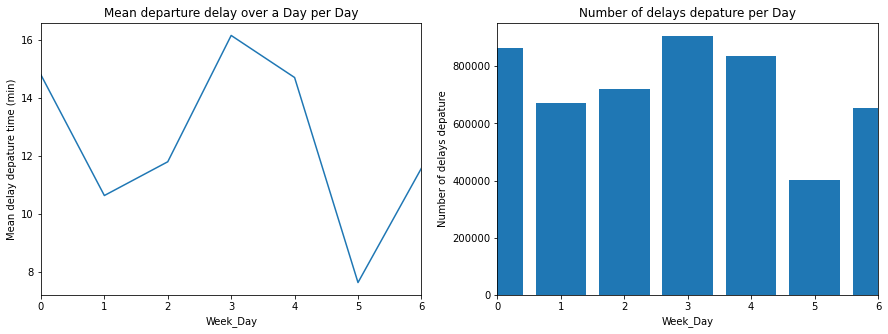

In [8]:
df_fl['Date'] = pd.to_datetime(df_fl[['year','month','day','hour']])
df_fl['Week_Day'] = df_fl['Date'].apply(lambda x: x.weekday())

day_data = pd.DataFrame(df_fl.groupby('Week_Day')['dep_delay'].mean().reset_index(name = 'Mean_Delay_Depature'))

pos_dep_del_filter_data = df_fl[df_fl.dep_delay > 0]
day2_data = pd.DataFrame(pos_dep_del_filter_data.groupby('Week_Day')['dep_delay'].sum().reset_index(name = 'Num_Of_Delays'))

day_data['Num_Of_Delays'] = day2_data['Num_Of_Delays']
print(day_data)

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(day_data.Week_Day, day_data.Mean_Delay_Depature)
axes[0].set(xlabel = 'Week_Day', ylabel = 'Mean delay depature time (min)', xlim = (0,6))
axes[0].set_title('Mean departure delay over a Day per Day')

axes[1].bar(day_data.Week_Day, day_data.Num_Of_Delays)
axes[1].set(xlabel = 'Week_Day', ylabel = 'Number of delays depature', xlim = (0,6))
axes[1].set_title('Number of delays depature per Day')

plt.show()

It can be seen that Saturday has the lowest latency rate (by number, average). 
Check the number of departures by day. 

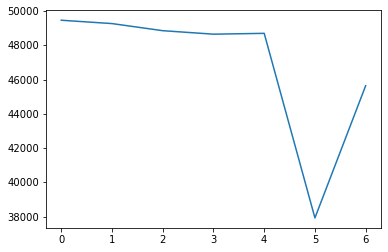

In [9]:
day2_data = pd.DataFrame(df_fl.groupby('Week_Day')['dep_delay'].count().reset_index(name = 'Quantity'))
day2_data.head()

plt.plot(day2_data.Week_Day, day2_data.Quantity)

plt.show()

### Conclusion

The reason for which delays are the least on Saturday is the relatively small number of departures.This may be due to the fact that the number of business trips on weekends is greatly reduced. So, the sturday is the best day to flight. Airports are less busy on Saturday, so you can reduce the number of employees on this day by providing a day off

---

### Case №3
On average, how do departure delays vary over the course of a day?


    hour  Mean_Delay_Departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    4.0             -5.554098
5    5.0             -4.355644
6    6.0             -1.520552
7    7.0              0.223289
8    8.0              1.091432
9    9.0              4.268295
10  10.0              5.548644
11  11.0              5.652309
12  12.0              7.601892
13  13.0              9.380639
14  14.0              8.090381
15  15.0             10.682049
16  16.0             13.621150
17  17.0             16.756593
18  18.0             18.664671
19  19.0             21.497342
20  20.0             28.266213
21  21.0             42.064964
22  22.0             68.190042
23  23.0             96.946865
24  24.0             64.862069


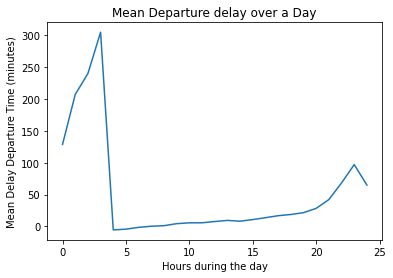

In [10]:
day3_data = pd.DataFrame(df_fl.groupby([df_fl.hour])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))
print(day3_data)

plt.plot(day3_data.hour, day3_data.Mean_Delay_Departure,'')
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Hours during the day')
plt.title('Mean Departure delay over a Day')
plt.show()

The departure delays are higher in the late night - early morning flights to the mid day flights. The reason for this could be more number of flights taking off during night times.Let's see how many depatures were in each hour.

    hour  Num_Of_Delays  Total_Num_Of_Depatures  percent_of_delays        mean
0    0.0            881                     881         100.000000  128.642452
1    1.0            223                     223         100.000000  207.049327
2    2.0             64                      64         100.000000  239.921875
3    3.0             11                      11         100.000000  304.727273
4    5.0            368                    7246           5.078664   -5.554098
5    6.0           4126                   22699          18.177012   -4.355644
6    7.0           4455                   21461          20.758585   -1.520552
7    8.0           6190                   26424          23.425674    0.223289
8    9.0           5508                   18871          29.187642    1.091432
9   10.0           5009                   16076          31.158248    4.268295
10  11.0           4813                   16762          28.713757    5.548644
11  12.0           5668                   16071     

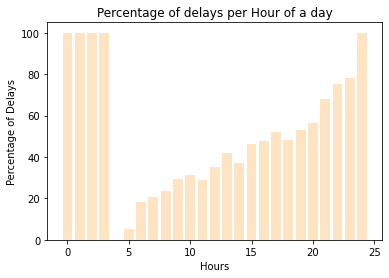

In [11]:
hour_data = pd.DataFrame(pos_dep_del_filter_data.groupby('hour')['dep_delay'].size().reset_index(name = 'Num_Of_Delays'))
hour_data2 = pd.DataFrame(df_fl.groupby('hour')['dep_delay'].size().reset_index(name = 'Total_Num_Of_Depatures'))

df_merged = pd.merge(hour_data, hour_data2, on=['hour'])
df_merged['percent_of_delays'] = (df_merged.Num_Of_Delays/df_merged.Total_Num_Of_Depatures)*100
df_merged['mean'] = day3_data.Mean_Delay_Departure
print(df_merged)

plt.bar(df_merged.hour, df_merged.percent_of_delays, color="bisque")
plt.ylabel('Percentage of Delays')
plt.xlabel('Hours')
plt.title('Percentage of delays per Hour of a day')
plt.show()

We can see that 100% of flights are delyed for late night and early morning. Surprisingly, all flights that took off at night should have, on average, departed at 22:00. Also we see a monotonous increase in delays closer to the night. It turns out that the delay of one flight leads to an automatic delay of subsequent flights. Only late at night, all flights leave for points of arrival. I wondered if it was some particular airline that delayed flights by the evening the most. I grouped the data by carrier and looked at whose percentage of delays at night out of the total number of flights is greater.

   carrier  Num_of_Delays_at_24.00  Tot_Num_of_Delays   percent
0       9E                      14              18460  0.075840
1       AA                      16              32729  0.048886
2       B6                     602              54635  1.101858
3       DL                      36              48110  0.074829
4       EV                     105              54173  0.193823
5       F9                       1                685  0.145985
6       FL                      11               3260  0.337423
7       MQ                      14              26397  0.053036
8       UA                      44              58665  0.075002
9       US                       8              20536  0.038956
10      VX                       8               5162  0.154979
11      WN                      22              12275  0.179226


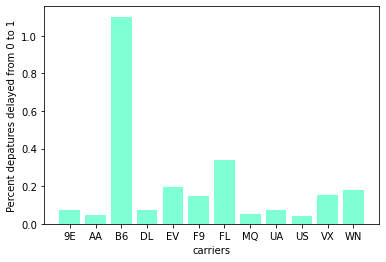

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  carrier  Num_of_Delays_at_24.00  Tot_Num_of_Delays   percent
0      9E                       3              18460  0.016251
1      AA                       2              32729  0.006111
2      B6                     146              54635  0.267228
3      DL                      15              48110  0.031179
4      EV                      33              54173  0.060916
5      FL                       4               3260  0.122699
6      MQ                       2              26397  0.007577
7      UA                      10              58665  0.017046
8      US                       2              20536  0.009739
9      WN                       6              12275  0.048880


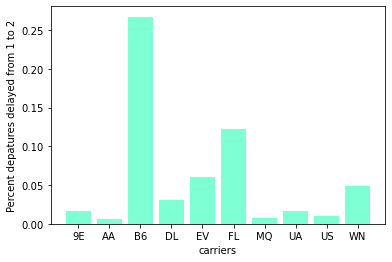

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  carrier  Num_of_Delays_at_24.00  Tot_Num_of_Delays   percent
0      B6                      45              54635  0.082365
1      DL                       8              48110  0.016629
2      EV                       3              54173  0.005538
3      FL                       3               3260  0.092025
4      UA                       2              58665  0.003409
5      US                       1              20536  0.004869
6      WN                       2              12275  0.016293


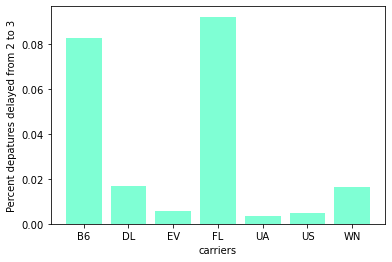

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [12]:
for i in range(0,3):
    df_hour_filtered = df_fl.loc[(df_fl.hour == i) & (df_fl.dep_delay > 0)]

    df_group_origin_delay = pd.DataFrame(df_hour_filtered.groupby('carrier').size().reset_index(name = 'Num_of_Delays_at_24.00'))
    df_group = pd.DataFrame(df_fl.groupby('carrier').size().reset_index(name = 'Tot_Num_of_Delays'))

    df_group_origin_del = pd.merge(df_group_origin_delay, df_group, on = ['carrier'])
    df_group_origin_del ['percent'] = (df_group_origin_del['Num_of_Delays_at_24.00']/df_group_origin_del['Tot_Num_of_Delays'])*100

    print(df_group_origin_del)

    plt.bar(df_group_origin_del.carrier, df_group_origin_del.percent, color = 'aquamarine')
    plt.xlabel('carriers')
    plt.ylabel('Percent depatures delayed from ' + str(i) + ' to ' + str(i+1) )
    plt.show()
    print('―' * 100)

### Conclusion
We can notice that in the vast majority of cases (except the last one), the B6 carrier most often delayed evening flights.

---


### Case №4
Which carriers have been the top and the bottom performers in 2013?
This question will help us identify the carriers which have been performing badly through out the year. By knowing this we can help the general public to avoid commuting by this carrier. I'm going to ignore the flights which departed delayed though arrived on or before time.

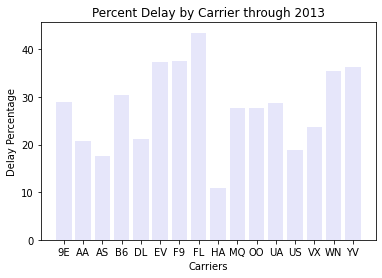

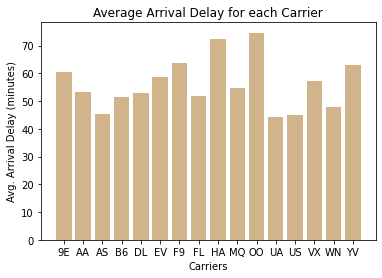

In [13]:
df_filtered_carrier = df_fl[(df_fl.arr_delay>0) & (df_fl.dep_delay>0)]  

grouped_career_filtered = df_filtered_carrier.groupby([df_filtered_carrier.carrier]).size().reset_index(name='Size')

df_filtered_total = df_fl[np.isfinite(df_fl['dep_time'])] 

grouped_career_total = df_filtered_total.groupby([df_filtered_total.carrier]).size().reset_index(name='Total_Size')

df_col_merged = pd.merge(grouped_career_filtered, grouped_career_total, on=['carrier'])

df_col_merged['Percentage_Delays'] = (df_col_merged.Size/df_col_merged.Total_Size)*100

df_col_merged

ind = np.arange(len(df_col_merged.carrier))
plt.bar(ind, df_col_merged.Percentage_Delays, color="lavender")
plt.ylabel('Delay Percentage')
plt.xlabel('Carriers')
plt.title('Percent Delay by Carrier through 2013')
plt.xticks(ind, df_col_merged.carrier)
plt.show()

df_mean_arr_delay = df_filtered_carrier.groupby([df_filtered_carrier.carrier])['arr_delay'].mean().reset_index(name='Mean_Arrival_Delay')

ind = np.arange(len(df_mean_arr_delay.carrier))
plt.bar(ind, df_mean_arr_delay.Mean_Arrival_Delay, color="tan")
plt.ylabel('Avg. Arrival Delay (minutes)')
plt.xlabel('Carriers')
plt.title('Average Arrival Delay for each Carrier')
plt.xticks(ind, df_col_merged.carrier)
plt.show()

### Conclusion

We see that carrier FL has the highest delay %, thus making it the least performer among other carriers. Carrier HA has the best performance in terms of delay %. Also we observe that OO and HA have higher arrival delays among other carriers. UA and US carriers perform best when looking from this perspective. I have considered average arrival delay because I think that in all for a traveller the delay in reaching a particular point is more significant than delay in departure.

---

### Case № 5
#### Weather - case
Let's look at how delays are related to weather conditions

    visib  TotalDelay      Count
                 mean       mean
0    0.12   53.125926   9.333333
1    0.25   50.368918   9.266667
2    0.50   48.025944   8.081081
3    0.75  108.043222  10.375000
4    1.00   44.052121   8.615385
5    1.25   99.533333  15.000000
6    1.50   57.758718  10.785714
7    1.75  106.130952   7.000000
8    2.00   53.179340  10.566265
9    2.50   57.614434   9.750000
10   3.00   43.960403  11.780488
11   4.00   44.990879   9.128571
12   5.00   45.245112  10.178947
13   6.00   45.309186   7.691729
14   7.00   42.906023   8.536000
15   8.00   41.097958   8.829268
16   9.00   46.031925   9.126394
17  10.00   36.867483   7.761381


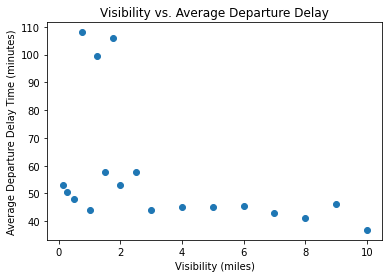

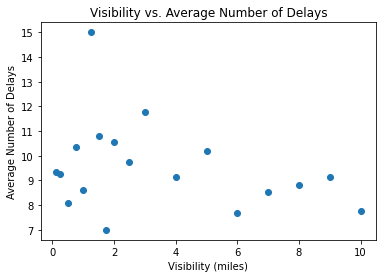

In [16]:
df_fl_filtered_delayed = df_fl[(df_fl.dep_delay>0)] 

grouped_data = df_fl_filtered_delayed.groupby([df_fl_filtered_delayed.origin, df_fl_filtered_delayed.month, df_fl_filtered_delayed.day, df_fl_filtered_delayed.hour])
grouped_origin_time_hour = grouped_data['dep_delay'].agg([np.size, np.mean]).reset_index()

df_weather_flights = pd.merge(grouped_origin_time_hour, df_wthr, on=['origin','hour','day','month'])
df_weather_flights = df_weather_flights.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})

visib_df = df_weather_flights.groupby([df_weather_flights.visib])[['TotalDelay', 'Count']].agg([np.mean]).reset_index()
print(visib_df)

plt.scatter(visib_df.visib, visib_df.TotalDelay)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Visibility (miles)')
plt.title('Visibility vs. Average Departure Delay')
plt.show()

plt.scatter(visib_df.visib, visib_df.Count)
plt.ylabel('Average Number of Delays')
plt.xlabel('Visibility (miles)')
plt.title('Visibility vs. Average Number of Delays')
plt.show()

From the above graphics we can see that lower the visibility slightly higher are the average departure delay time and average count of number of delays. This proves that one of the weather variable like the visibility slightly impacts the flights from NYC. Let's see at the wind_speed on flight's delays.

    wind_speed      Count  TotalDelay
0      0.00000   6.965066   32.212572
1      3.45234   7.073048   32.507615
2      4.60312   7.032075   34.932986
3      5.75390   7.375000   35.489686
4      6.90468   7.923205   38.881932
5      8.05546   7.447552   40.617614
6      9.20624   8.196213   39.996826
7     10.35702   8.170732   36.244881
8     11.50780   8.254167   41.321800
9     12.65858   8.559902   39.965520
10    13.80936   8.786350   40.934946
11    14.96014   9.021739   43.074567
12    16.11092   9.241379   46.835656
13    17.26170  10.050314   43.856463
14    18.41248   9.280303   40.581763
15    19.56326   8.567901   43.970152
16    20.71404  10.048387   45.427627
17    21.86482   9.285714   41.356599
18    23.01560  10.032258   36.087406
19    24.16638   9.307692   49.657713
20    25.31716  10.142857   50.013629
21    26.46794   8.375000   66.838477
22    27.61872  10.666667   35.056583
23    28.76950  11.142857  104.109409
24    29.92028   9.000000   13.125000
25    31.071

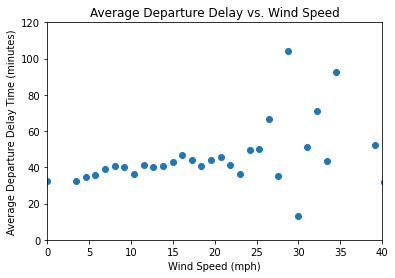

In [17]:
df_wind = df_weather_flights.dropna(subset = ['wind_speed'])
wind_d = df_wind.groupby([df_wind.wind_speed])[['Count','TotalDelay']].mean().reset_index()
print(wind_d)

plt.scatter(wind_d.wind_speed, wind_d.TotalDelay)
plt.xlim([0, 40])
plt.ylim([0, 120])
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Wind Speed (mph)')
plt.title('Average Departure Delay vs. Wind Speed')
plt.show()

### Conclusion
I grouped on wind_speed and show mean dep_delay in minutes per value of wind_speed.The above graphic depicts that as the wind speed increases the average departure delay time increases. Thus wind_speed impacts flights from NYC.